In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# !pip install boruta
# !pip install tqdm
# !pip install imblearn
# !pip install openpyxl
# !pip install ipywidgets --upgrade
# !pip install jupyter --upgrade
# !pip install xgboost

In [ ]:
# !pip3 install jupyter-tabnine
# !jupyter nbextension install --py jupyter_tabnine
# !jupyter nbextension enable --py jupyter_tabnine
# !jupyter serverextension enable --py jupyter_tabnine

In [1]:
################# SATURDAYSAI #################
### Importación de las librerías necesarias ###
###############################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, SparsePCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter

# rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
LABELS = ["1","2"]

from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

#### Selección de variables con Boruta ####
import boruta 
from sklearn.ensemble import RandomForestClassifier

# Clusterings
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering

# Elbow method en clustering
from tqdm.notebook import tqdm

### árbol de Decisión ###
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

### Naive Bayes ###
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

from xgboost import XGBClassifier

%matplotlib inline


# Carga de datos

In [2]:
### Importación de la Base de datos ###
# file = "/content/drive/My Drive/Proyecto SaturdaysAI - Prediccion de ludopatia/EstudioPrevalencia2015.xlsx"
file = './EstudioPrevalencia2015.xlsx'
xl = pd.ExcelFile(file)

In [3]:
print(xl.sheet_names)

['Hoja1', 'BBDD fichero total', 'títulos y códigos']


In [4]:
df=xl.parse('BBDD fichero total')

In [5]:
df.head(10)

,numero,modalidad,P0R1,P0B,POB1,P0B2,P0C,P0F1,POF2,POF3,...,DB4,DB5,DB6,DB6B,DB7,DB8,PESO,PESO1,revisadas_personales,revisadas_telefónicas
0,1006,1,9,4,4,32,1,1,1.0,2.0,...,4,2,2,NaN,1,3,1.128607,1.128607,NaN,NaN
1,1007,1,3,5,6,52,1,1,1.0,2.0,...,5,1,1,NaN,1,1,1.100234,1.100234,NaN,NaN
2,1008,1,4,5,8,67,2,1,1.0,2.0,...,100,4,5,NaN,1,4,1.196041,1.196041,NaN,NaN
3,1009,1,5,5,7,60,2,1,1.0,2.0,...,100,2,3,NaN,1,3,1.062141,1.062141,NaN,NaN
4,1010,1,5,5,6,51,2,1,1.0,2.0,...,5,2,3,NaN,1,3,1.062141,1.062141,NaN,1.0
5,1011,1,5,5,3,18,1,1,1.0,2.0,...,2,99,1,NaN,1,3,1.062141,1.062141,NaN,NaN
6,1012,1,5,5,4,27,2,1,1.0,1.0,...,4,1,1,NaN,1,3,0.720738,0.753777,NaN,NaN
7,1013,1,5,5,4,34,2,1,1.0,2.0,...,100,2,2,NaN,1,2,1.062141,1.062141,NaN,NaN
8,1014,1,5,5,7,62,1,1,2.0,NaN,...,100,2,3,NaN,1,2,1.062141,1.062141,NaN,NaN
9,1015,1,9,1,4,34,2,2,NaN,NaN,...,6,2,2,NaN,1,2,1.128607,1.128607,NaN,1.0


In [6]:
df.describe()

,numero,modalidad,P0R1,P0B,POB1,P0B2,P0C,P0F1,POF2,POF3,...,DB4,DB5,DB6,DB6B,DB7,DB8,PESO,PESO1,revisadas_personales,revisadas_telefónicas
count,6816.000000,6816.0,6816.000000,6816.000000,6816.000000,6816.000000,6816.000000,6816.000000,5202.000000,4669.000000,...,6816.000000,6816.000000,6816.000000,149.000000,6816.000000,6816.000000,6816.000000,6816.000000,660.0,1307.0
mean,4577.223738,1.0,8.456719,3.571156,5.777142,47.907864,1.516432,1.236796,1.102461,1.911544,...,39.057072,2.367811,2.843603,5.993289,1.098005,2.488116,1.050457,1.046409,1.0,1.0
std,2076.015852,0.0,4.826821,1.763138,1.626472,17.571003,0.499767,0.425147,0.303282,0.283987,...,46.042025,6.428943,6.887837,1.646030,2.087890,7.864340,0.181920,0.182712,0.0,0.0
min,1006.000000,1.0,1.000000,1.000000,3.000000,18.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,0.175572,0.131613,1.0,1.0
25%,2777.750000,1.0,5.000000,2.000000,4.000000,34.000000,1.000000,1.000000,1.000000,2.000000,...,4.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.082998,1.082998,1.0,1.0
50%,4565.500000,1.0,9.000000,4.000000,6.000000,46.000000,2.000000,1.000000,1.000000,2.000000,...,5.000000,2.000000,2.000000,5.000000,1.000000,2.000000,1.107651,1.107651,1.0,1.0
75%,6359.250000,1.0,13.000000,5.000000,7.000000,62.000000,2.000000,1.000000,1.000000,2.000000,...,100.000000,2.000000,3.000000,7.000000,1.000000,3.000000,1.115778,1.115778,1.0,1.0
max,8240.000000,1.0,19.000000,6.000000,8.000000,95.000000,2.000000,2.000000,2.000000,2.000000,...,100.000000,100.000000,100.000000,16.000000,100.000000,100.000000,1.196041,1.196041,1.0,1.0


# Limpieza de los datos

In [7]:
# Declaración de funciones para limpiar el Dataframe

def change_99_100_callback(x):
    if (type(x) == int or type(x) == float) and x >= 99.0:
      return 0.0
    else :
      return x

def change_99_100(x):
    return x.apply(change_99_100_callback)

def change_column_P23(x):
    if (type(x) == int or type(x) == float) and x >= 2.0:
      return 2
    else :
      return 1

def cleanDataset(df):
  print("Tamaño del dataframe antes de limpieza ", df.shape)

  new_df = df[df['P23'] <= 3]
  print("Eliminadas filas que no han contestado a la variable objetivo ", new_df.shape )

  new_df = new_df.drop(['numero', 'modalidad'],1)
  print("Eliminadas columnas que no aportan valor ", new_df.shape)

  new_df = new_df[['P0R1','P0B','POB1','P0C','P3','P4','P5','P6','P7','P8','P9','P11',
                   'P13','P15A','P16A','P18A','P18B','P18C','P20','P21','P22','P24','P26',
                   'P28','P29','P30','P31','P32','P33','P34','P35','P38SP1','P38SP2',
                   'P38SP3','P38SP4','P38SP5','P38SP6','P38SP7','P38SP8','P38SP9',
                   'P39','P41','P43','P46','DB0','DB1','DB3','DB4','DB5','DB6','DB7','DB8', 'P23'
                  ]]
  print("Después del análisis del investigador dejamos las columnas más interesantes ", new_df.shape)

  new_df = new_df.apply(change_99_100)
  print("Eliminados los valores de 99 o 100", new_df.shape)

  new_df['P23'] = new_df['P23'].apply(change_column_P23)
  print("Unificados Valores de P23 2 y 3 en solo 2", new_df.shape)

#   new_df = new_df.dropna(axis=1, how='any')
#   print("Eliminadas todas las columnas con al menos un valor nulo", new_df.shape)
#   new_df = new_df.dropna(axis=1, thresh=int(round(0.99*new_df.shape[0])))
#   print("Eliminadas todas las columnas menos de un 99% de valores NO NULOS", new_df.shape)

  return new_df

In [8]:
df_cleaned = cleanDataset(df)
df_cleaned.head()

Tamaño del dataframe antes de limpieza  (6816, 240)
Eliminadas filas que no han contestado a la variable objetivo  (5159, 240)
Eliminadas columnas que no aportan valor  (5159, 238)
Después del análisis del investigador dejamos las columnas más interesantes  (5159, 53)
Eliminados los valores de 99 o 100 (5159, 53)
Unificados Valores de P23 2 y 3 en solo 2 (5159, 53)


,P0R1,P0B,POB1,P0C,P3,P4,P5,P6,P7,P8,...,P46,DB0,DB1,DB3,DB4,DB5,DB6,DB7,DB8,P23
0,9,4,4,1,1.0,1.0,1.0,5.0,2.0,1.0,...,7.0,4.0,2.0,1.0,4.0,2.0,2.0,1,3.0,1
1,3,5,6,1,1.0,1.0,2.0,5.0,1.0,2.0,...,8.0,3.0,4.0,5.0,5.0,1.0,1.0,1,1.0,1
2,4,5,8,2,1.0,1.0,2.0,5.0,2.0,1.0,...,9.0,2.0,4.0,0.0,0.0,4.0,5.0,1,4.0,1
3,5,5,7,2,1.0,1.0,1.0,5.0,2.0,2.0,...,11.0,3.0,1.0,0.0,0.0,2.0,3.0,1,3.0,1
4,5,5,6,2,1.0,1.0,1.0,5.0,2.0,1.0,...,9.0,3.0,1.0,3.0,5.0,2.0,3.0,1,3.0,1


# Análisis descriptivo de los datos

In [9]:
df_cleaned.columns

Index(['P0R1', 'P0B', 'POB1', 'P0C', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P11', 'P13', 'P15A', 'P16A', 'P18A', 'P18B', 'P18C', 'P20', 'P21',
       'P22', 'P24', 'P26', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34',
       'P35', 'P38SP1', 'P38SP2', 'P38SP3', 'P38SP4', 'P38SP5', 'P38SP6',
       'P38SP7', 'P38SP8', 'P38SP9', 'P39', 'P41', 'P43', 'P46', 'DB0', 'DB1',
       'DB3', 'DB4', 'DB5', 'DB6', 'DB7', 'DB8', 'P23'],
      dtype='object')

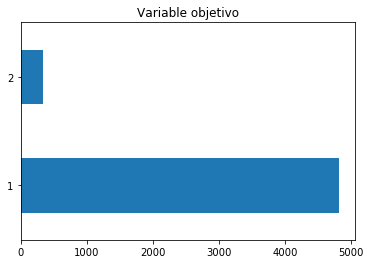

In [10]:
### Variable Objetivo ###
plot= df_cleaned['P23'].value_counts().plot(kind='barh', title="Variable objetivo") 

**Variable objetivo y comunidad autónoma**

In [11]:
### Tabla Variable objetivo - Comunidad autónoma ###
pd.crosstab(df_cleaned['P23'], df_cleaned['P0R1'], margins=True)


P0R1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,All
P23,,,,,,,,,,,,,,,,,,,,
1,1023,150,146,129,254,63,215,173,509,563,83,315,633,153,72,225,44,37,33,4820
2,33,7,5,3,19,1,33,14,36,31,5,20,77,6,4,24,16,1,4,339
All,1056,157,151,132,273,64,248,187,545,594,88,335,710,159,76,249,60,38,37,5159


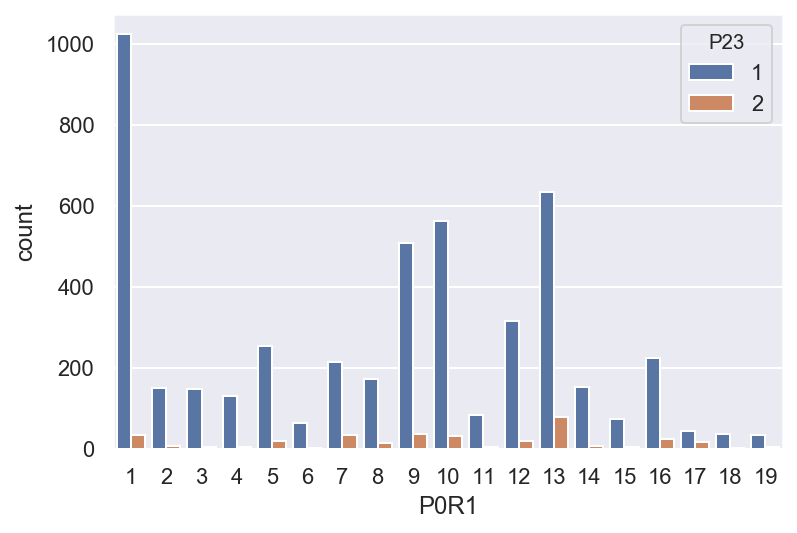

In [12]:
sns.set()
%config InlineBackend.figure_format='retina'
sns.countplot(x='P0R1', hue='P23', data=df_cleaned);

**Variable objetivo y edad**

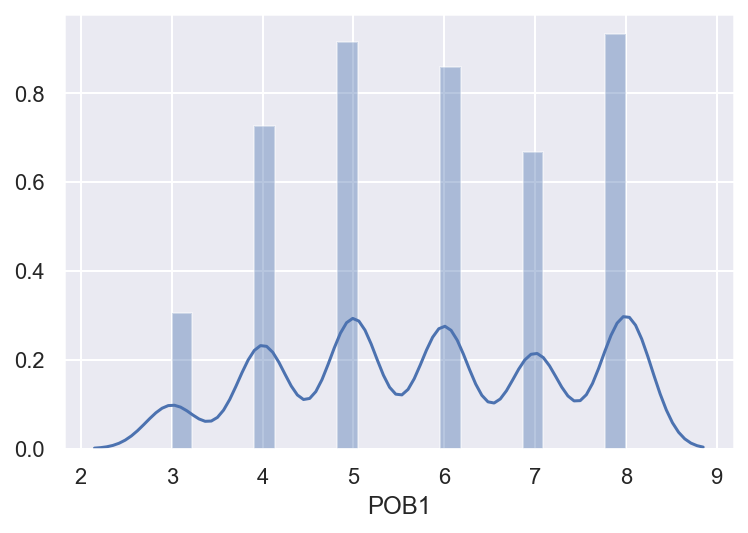

In [13]:
### Histograma de la edad ###
sns.distplot(df_cleaned['POB1'])

(array([ 357.,    0.,  850.,    0.,    0., 1071.,    0., 1006.,  783.,
        1092.]),
 array([1.09861229, 1.19669521, 1.29477814, 1.39286106, 1.49094399,
        1.58902692, 1.68710984, 1.78519277, 1.88327569, 1.98135862,
        2.07944154]),
 <a list of 10 Patch objects>)

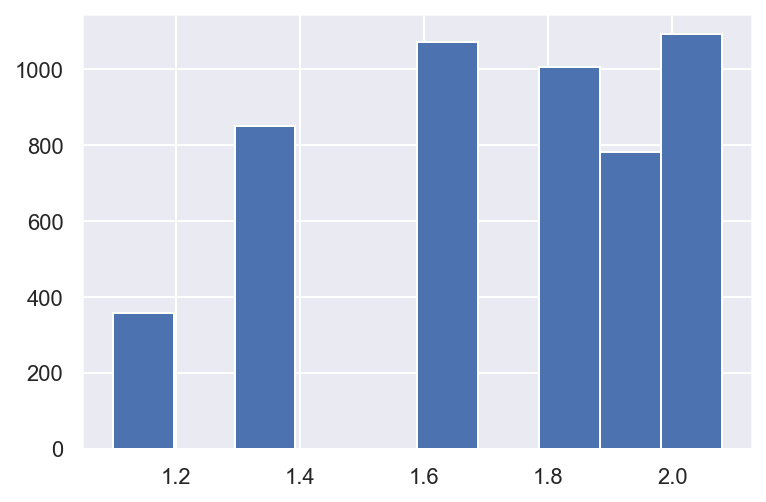

In [14]:
### Histograma ###
log_edad = np.log(df_cleaned['POB1'])
plt.hist(log_edad)

**Variable objetivo y sexo**

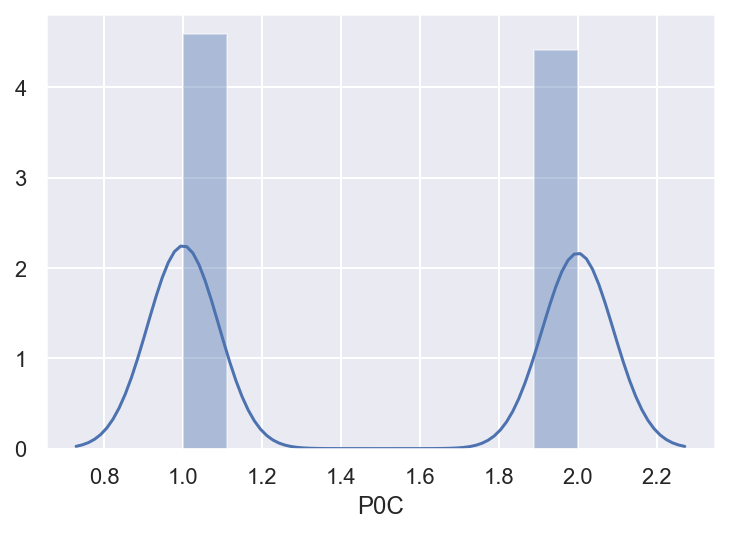

In [15]:
### Histograma del sexo ###
sns.distplot(df_cleaned['P0C'])

**Histograma estado de salud**

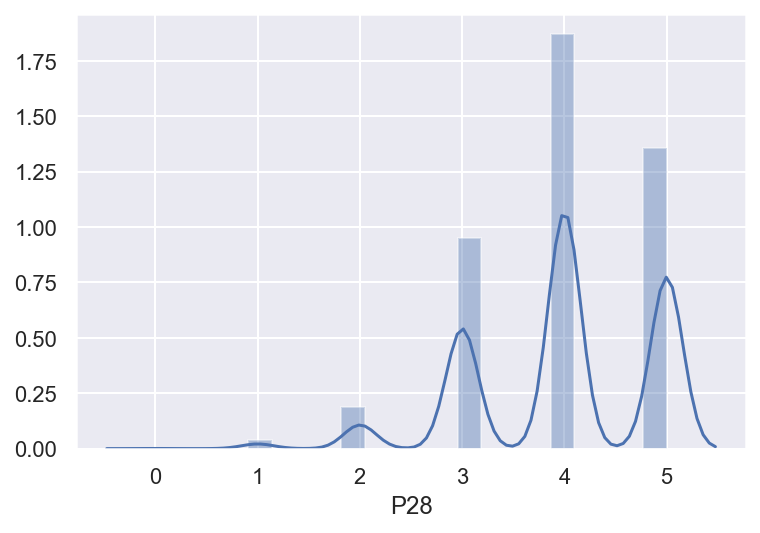

In [16]:
### Histograma Estado de Salud ###
sns.distplot(df_cleaned['P28'])

In [17]:
df_cleaned.head()

,P0R1,P0B,POB1,P0C,P3,P4,P5,P6,P7,P8,...,P46,DB0,DB1,DB3,DB4,DB5,DB6,DB7,DB8,P23
0,9,4,4,1,1.0,1.0,1.0,5.0,2.0,1.0,...,7.0,4.0,2.0,1.0,4.0,2.0,2.0,1,3.0,1
1,3,5,6,1,1.0,1.0,2.0,5.0,1.0,2.0,...,8.0,3.0,4.0,5.0,5.0,1.0,1.0,1,1.0,1
2,4,5,8,2,1.0,1.0,2.0,5.0,2.0,1.0,...,9.0,2.0,4.0,0.0,0.0,4.0,5.0,1,4.0,1
3,5,5,7,2,1.0,1.0,1.0,5.0,2.0,2.0,...,11.0,3.0,1.0,0.0,0.0,2.0,3.0,1,3.0,1
4,5,5,6,2,1.0,1.0,1.0,5.0,2.0,1.0,...,9.0,3.0,1.0,3.0,5.0,2.0,3.0,1,3.0,1


In [18]:
df_cleaned.describe()

,P0R1,P0B,POB1,P0C,P3,P4,P5,P6,P7,P8,...,P46,DB0,DB1,DB3,DB4,DB5,DB6,DB7,DB8,P23
count,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,...,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000
mean,8.170576,3.560380,5.830393,1.490599,1.219616,1.342896,1.560186,4.831750,1.800737,1.477806,...,8.526071,2.818376,2.291336,2.310913,2.952704,1.960651,2.399302,1.041481,1.849971,1.065710
std,5.048003,1.758982,1.568310,0.499960,0.702592,0.723024,0.744771,0.665432,0.563384,0.789030,...,1.676205,0.837612,1.638827,1.729883,2.191424,0.793661,1.264653,0.199419,1.216874,0.247799
min,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,3.000000,2.000000,5.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,...,8.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,9.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,1.000000,...,9.000000,3.000000,1.000000,3.000000,4.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,13.000000,5.000000,7.000000,2.000000,1.000000,1.000000,2.000000,5.000000,2.000000,2.000000,...,10.000000,3.000000,4.000000,4.000000,5.000000,2.000000,3.000000,1.000000,3.000000,1.000000
max,19.000000,6.000000,8.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.000000,5.000000,...,11.000000,4.000000,6.000000,7.000000,7.000000,4.000000,6.000000,2.000000,5.000000,2.000000


**Eliminamos las variables nominales para realizar la matriz de correlaciones,
dejando solo las ordinales y las dicotómicas**

In [19]:
print('Antes de eliminar las variables nominales ', df_cleaned.shape)
df_without_nominales = df_cleaned.drop(columns=['P0R1','P0C','P6','P9','P13','DB1','DB5'])
print('Despues de eliminar las variables correladas ', df_without_nominales.shape)

Antes de eliminar las variables nominales  (5159, 53)
Despues de eliminar las variables correladas  (5159, 46)


**Matriz de correlaciones:**

,P0B,POB1,P3,P4,P5,P7,P8,P11,P15A,P16A,...,P41,P43,P46,DB0,DB3,DB4,DB6,DB7,DB8,P23
P0B,1.000000,0.020072,0.020682,0.025585,-0.019364,0.000982,0.029636,0.033481,-0.023215,-0.003932,...,-0.012588,-0.002358,-0.036974,0.056543,-0.045861,-0.103718,-0.024250,0.009841,-0.076218,0.005347
POB1,0.020072,1.000000,-0.012448,0.017255,0.133388,-0.011062,0.063064,0.171350,0.006342,0.002485,...,-0.014444,0.002428,-0.137160,-0.399329,-0.002166,-0.068438,0.606989,-0.087081,-0.281155,-0.005282
P3,0.020682,-0.012448,1.000000,0.427359,0.361433,0.117218,0.321049,-0.012324,-0.213156,-0.259898,...,0.002794,-0.036609,-0.024761,-0.066893,0.033446,0.023101,0.013163,0.016666,0.028400,0.132105
P4,0.025585,0.017255,0.427359,1.000000,0.395439,0.115909,0.625177,-0.023754,-0.184874,-0.208472,...,-0.028103,-0.040290,-0.034363,-0.062751,0.012181,-0.007998,0.013674,-0.002293,-0.015268,0.136367
P5,-0.019364,0.133388,0.361433,0.395439,1.000000,0.193872,0.519617,-0.038898,-0.181661,-0.218785,...,0.027446,-0.055045,-0.056055,-0.098691,0.005413,-0.033843,0.101635,0.013506,-0.042746,0.123064
P7,0.000982,-0.011062,0.117218,0.115909,0.193872,1.000000,0.163511,-0.003160,-0.034287,-0.074124,...,0.048044,0.006392,0.055536,0.005393,-0.015285,-0.008092,-0.022799,-0.029446,0.009795,0.045668
P8,0.029636,0.063064,0.321049,0.625177,0.519617,0.163511,1.000000,-0.022732,-0.178543,-0.197321,...,-0.021069,-0.054014,-0.038339,-0.098281,-0.000300,-0.025231,0.042666,-0.004060,-0.011041,0.122044
P11,0.033481,0.171350,-0.012324,-0.023754,-0.038898,-0.003160,-0.022732,1.000000,0.027224,0.008061,...,-0.014268,0.013395,0.001488,-0.037526,0.045735,0.053373,0.118934,0.041489,-0.019499,-0.025508
P15A,-0.023215,0.006342,-0.213156,-0.184874,-0.181661,-0.034287,-0.178543,0.027224,1.000000,0.456553,...,0.124725,0.292258,0.098799,0.034526,-0.012356,0.007838,0.040776,-0.019971,0.044240,-0.267500
P16A,-0.003932,0.002485,-0.259898,-0.208472,-0.218785,-0.074124,-0.197321,0.008061,0.456553,1.000000,...,0.075282,0.174402,0.080462,0.029743,-0.009452,0.010954,0.025203,-0.019053,0.011295,-0.236356


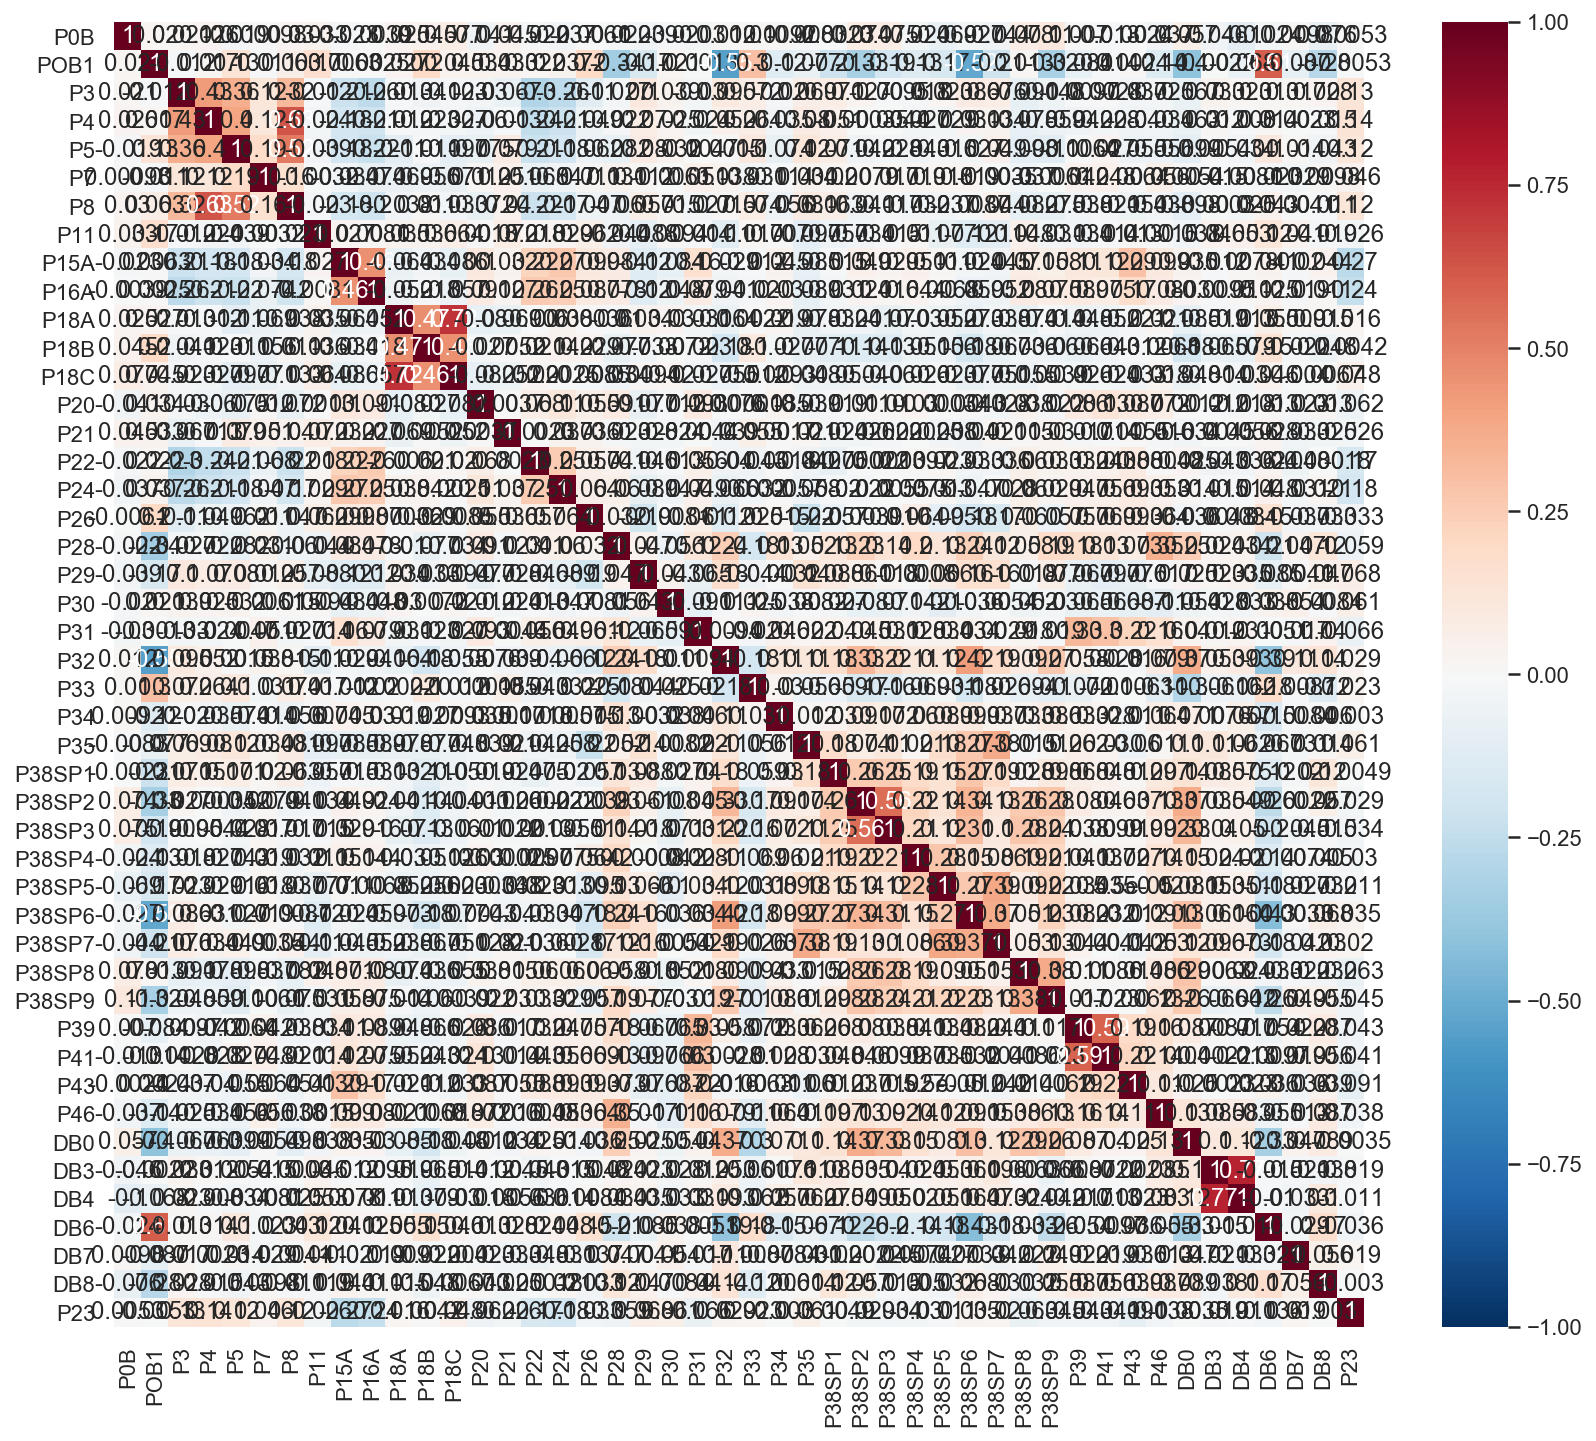

In [20]:
### Relaciones entre las features ###
correlation_spearman = df_without_nominales.corr(method = "spearman")
display(correlation_spearman)
plt.figure(figsize=(14, 12))
import seaborn as sns
heatmap = sns.heatmap(correlation_spearman, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

**Nuevo data frame sin variables correladas:**

In [21]:
print('Antes de eliminar las variables correladas ', df_cleaned.shape)
df_without_correlations = df_cleaned.drop(columns=["P4","P5","P6","P11","P16A","P18B","P18C","P32","P38SP3","P38SP6","DB3","DB4","DB6"])
print('Despues de eliminar las variables correladas ', df_without_correlations.shape)

Antes de eliminar las variables correladas  (5159, 53)
Despues de eliminar las variables correladas  (5159, 40)


In [22]:
df_without_correlations["P23"].value_counts()

1    4820
2     339
Name: P23, dtype: int64

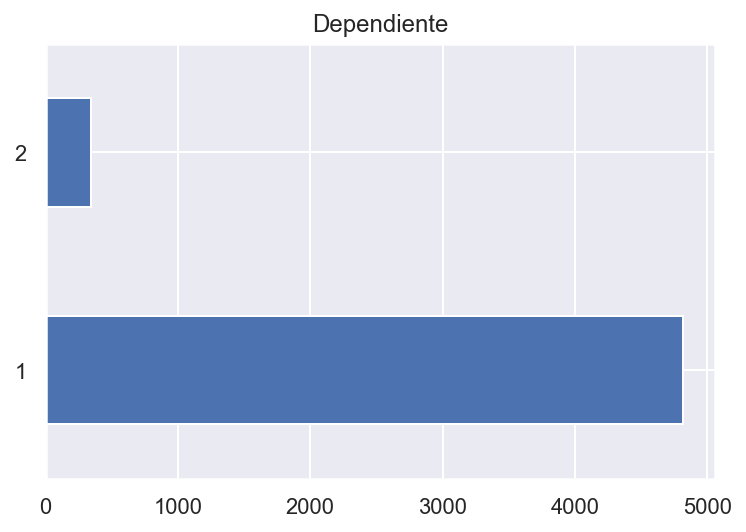

In [23]:
plot= df_without_correlations["P23"].value_counts().plot(kind='barh', title="Dependiente") 

# Creación de los conjuntos de Train y Test

In [24]:
y = df_without_correlations['P23']
X = df_without_correlations.drop('P23', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

print('X train Shape: ' , X_train.shape, '; Y train Shape: ' , y_train.shape)
print('X test Shape: ' , X_test.shape, '; Y test Shape: ' , y_test.shape)

X train Shape:  (3611, 39) ; Y train Shape:  (3611,)
X test Shape:  (1548, 39) ; Y test Shape:  (1548,)


# Generación de datos sintéticos
*Debido a que la varaible objetivo está desbalanceada

In [25]:
### Balanceo SMOTE ###
from imblearn.combine import SMOTETomek

os_us = SMOTETomek(sampling_strategy=0.15)
X_train_balanced_result, y_train_balanced_result = os_us.fit_sample(X_train, y_train)

print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_balanced_result)))

Distribution of class labels before resampling Counter({1: 3365, 2: 246})
Distribution of class labels after resampling Counter({1: 3349, 2: 488})


In [26]:
X_train_balanced = pd.DataFrame(data=X_train_balanced_result, columns=X_train.columns)
y_train_balanced = pd.Series(data=y_train_balanced_result)   
# values | 1st column as index | 1st row as the column names

**Clase objetivo ANTES del balanceo:**

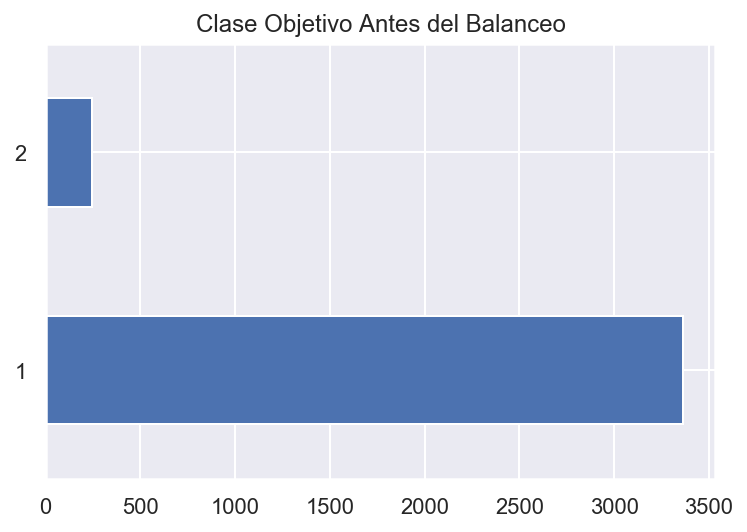

In [27]:
plot= y_train.value_counts().plot(kind='barh', title="Clase Objetivo Antes del Balanceo") 

**Clase objetivo DESPUÉS del balanceo:**

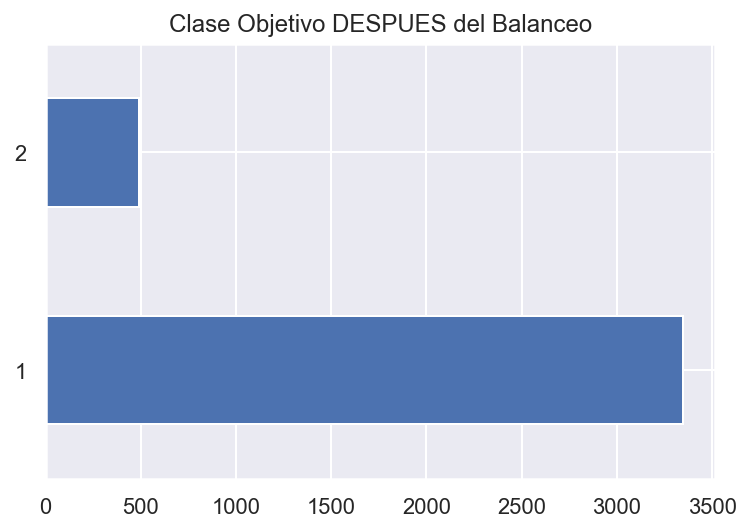

In [28]:
plot= y_train_balanced.value_counts().plot(kind='barh', title="Clase Objetivo DESPUES del Balanceo") 

# Seleccion de variables

## Método 1: Test Chi-Cuadrado de Pearson

In [29]:
def asociacion(df, var_obj):
    '''
    Función que devuelve las variables asociadas con la variable objetivo.

    Parameters
    ----------
    df : dataframe con las variables que queremos cruzar.
    var_obj : Variable objetivo.

    Returns
    -------
    features_asoc : Lista con los nombres de las variables asociadas.

    '''
    
    from scipy.stats import chi2_contingency
    features_asoc = []
    for var in df.drop(columns=[var_obj]):
        crtb = pd.crosstab(df[var_obj], df[var], margins=False)
        chi2, p, dof, tb = chi2_contingency(crtb)      
        print('Asociación entre P23 y {}'. format(var))
        print('Chi-Cuadrado: {} p-valor: {}'. format(chi2, p))
        if p < 0.1:
            features_asoc.append(var)
    
    return features_asoc

# Entrenamiento y Evaluación de Modelos
# Regresión Logística

features_asociacion = asociacion(df_without_correlations, 'P23')

Asociación entre P23 y P0R1
Chi-Cuadrado: 120.1897562242664 p-valor: 3.864756167156738e-17
Asociación entre P23 y P0B
Chi-Cuadrado: 8.58482561050555 p-valor: 0.12681467747815914
Asociación entre P23 y POB1
Chi-Cuadrado: 6.047231193938657 p-valor: 0.3016502148996796
Asociación entre P23 y P0C
Chi-Cuadrado: 9.773034303883747 p-valor: 0.001770899505351085
Asociación entre P23 y P3
Chi-Cuadrado: 179.3375143244743 p-valor: 4.6912839508636397e-36
Asociación entre P23 y P7
Chi-Cuadrado: 111.59174527691185 p-valor: 3.3302526056840826e-23
Asociación entre P23 y P8
Chi-Cuadrado: 136.161937902648 p-valor: 1.1701627196153401e-27
Asociación entre P23 y P9
Chi-Cuadrado: 9.156457530098127 p-valor: 0.05730556929184377
Asociación entre P23 y P13
Chi-Cuadrado: 10.49280333717321 p-valor: 0.03289626663918426
Asociación entre P23 y P15A
Chi-Cuadrado: 370.61294415468586 p-valor: 3.3298273479133587e-81
Asociación entre P23 y P18A
Chi-Cuadrado: 20.46392587828782 p-valor: 0.058803415188415004
Asociación entre 

## Método 2: Boruta

In [30]:
X_train_for_boruta=np.matrix(X_train)
y_train_for_boruta=np.transpose(np.ravel(np.matrix(y_train), order='C'))

rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

In [31]:
boruta_selector = boruta.BorutaPy(rf, n_estimators='auto', verbose=2, random_state=4242, max_iter = 50, perc = 90)
boruta_selector.fit(X_train_for_boruta, np.ravel(y_train_for_boruta, order='C'))

Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	7 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	8 / 50
Confirmed: 	11
Tentative: 	9
Rejected: 	19
Iteration: 	9 / 50
Confirmed: 	11
Tentative: 	9
Rejected: 	19
Iteration: 	10 / 50
Confirmed: 	11
Tentative: 	9
Rejected: 	19
Iteration: 	11 / 50
Confirmed: 	11
Tentative: 	9
Rejected: 	19
Iteration: 	12 / 50
Confirmed: 	12
Tentative: 	5
Rejected: 	22
Iteration: 	13 / 50
Confirmed: 	12
Tentative: 	5
Rejected: 	22
Iteration: 	14 / 50
Confirmed: 	12
Tentative: 	5
Rejected: 	22
Iteration: 	15 / 50
Confirmed: 	12
Tentative: 	5
Rejected: 	22
Iteration: 	16 / 50
Confirmed: 	12
Tentative: 	5
Rejected: 	22
Iteratio

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=5,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=113, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x21D419F1678,
                                          verbose=0, warm_start=F

In [32]:
boruta_selector.ranking_

array([ 1, 12, 18, 20,  1,  1,  1, 13,  1,  1,  1, 10, 22,  1,  1, 23,  6,
        1,  7, 26,  9, 21,  1, 16,  2,  8,  4,  5,  1,  1, 23, 25, 18,  3,
       16, 13, 15, 27, 11])

In [33]:
print('Se han seleccionado ',boruta_selector.n_features_, ' variable del total de ',X_train_balanced.shape[1])

Se han seleccionado  13  variable del total de  39


In [34]:
features_boruta = list()
indexes = np.where(boruta_selector.support_ == True)
for x in np.nditer(indexes):
    features_boruta.append(X_train_balanced.columns.tolist()[x])
print(features_boruta)

['P0R1', 'P3', 'P7', 'P8', 'P13', 'P15A', 'P18A', 'P22', 'P24', 'P29', 'P35', 'P38SP8', 'P38SP9']


## Método 3: Análisis de componentes principales (PCA)

**Nota**:
Con el análisis de componentes principales se obtienen tantos componentes como dimensiones (número de variables) tengan los datos de entrada. Los componentes se ordenan de mayor a menor en función de la cantidad de varianza explicada por cada uno, y estan formados por una combinación específica de las variables originales.

Junto al PCA, también añado un SparsePCA, en la documentación de scikit-learn podemos entender por qué esto podría ser interesante para la selección de variables:

> "Principal component analysis (PCA) has the disadvantage that the components extracted by this method have exclusively dense expressions, i.e. they have non-zero coefficients when expressed as linear combinations of the original variables. This can make interpretation difficult. (...)
> Sparse principal components yields a more parsimonious, interpretable representation, clearly emphasizing which of the original features contribute to the differences between samples."

[Referencia](https://scikit-learn.org/stable/modules/decomposition.html#sparse-principal-components-analysis-sparsepca-and-minibatchsparsepca)

In [ ]:
RANDOM_STATE = 17  # Semilla para generar número aleatorio
scaler = StandardScaler()  # Estandarizamos los datos

# Seleccionamos el mínimo número de componentes para cubrir el 50% de la varianza:
pca = PCA(n_components=0.5, random_state=RANDOM_STATE)
# El parámetro alfa controla la «escasez» de componentes:
spar_pca = SparsePCA(alpha=0.2, random_state=RANDOM_STATE)

scaled_data = scaler.fit_transform(df_without_correlations.drop('P23', axis=1))
pca.fit(scaled_data)
spar_pca.fit(scaled_data)

num_components = pca.n_components_

print("Número total de componentes que explican el 50 pct de la varianza: %d" % num_components)
print("Porcentaje de varianza explicado por cada uno de los %d primeros componentes: \n" % num_components + str(pca.explained_variance_ratio_*100))

**Visualizamos la proyección de la variable objetivo en los dos primeros componentes principales:**

In [ ]:
# Generamos un data frame con los Componentes Principales obtenidos
columns = ["pc%d" % i for i in range(1, pca.n_components_+1)]
pca_df = pd.DataFrame(data = pca.transform(scaled_data), columns = columns)
print(pca_df.head())

plt.scatter(pca_df['pc1'], pca_df['pc2'], c=df_without_correlations['P23'].to_numpy(), s=20, cmap='viridis')

**Peso de cada una de las variables para PCA y SparsePCA:**

In [ ]:
pca_components = pca.components_
spar_pca_components = spar_pca.components_

print("\nContribución de las variables para los PCA y SparsePCA:")
for i in range(num_components):
    print("PCA"+str(i)+"\n"+str(pca_components[i])+"\n"+str(spar_pca_components[i]))

**Variables obtenidas del SparsePCA:**

In [ ]:
non_zero_idx = np.unique(np.nonzero(spar_pca_components)[1][:num_components+2])
print("Indices distintos de 0: " + str(non_zero_idx))
features_pca = df_without_correlations.columns[non_zero_idx].tolist()
print("\nLista de variables seleccionadas con la configuración actual:\n" + str(features_pca))
df_pca_vars = df_without_correlations[features_pca]
df_pca_vars.head()

### Comparamos las variables obtenidas mediante PCA y Boruta:

In [ ]:
SELECTION_PCA = "PCA"
SELECTION_CHI_CUADRADO = "Chi Cuadrado"
SELECTION_BORUTA = "Boruta"
SELECTION_IN_COMMON ="InCommon" # Solamente PCA y Boruta
SELECTION_IN_UNION="Union" # Solamente PCA y Boruta
executeMode = SELECTION_CHI_CUADRADO

In [ ]:
questionsDictionary = { 
    'POB1':'¿Me podría decir su edad?',
    'P0C':'Sexo',
    'P0R1':'¿Me podría indicar la comunidad autónoma en la que reside actualmente?',
    'P3':'¿Cuántas horas dedica a la semana a este tipo de juegos?',
    'P7':'¿Diría vd. que en el último año su gasto en juegos de azar ha disminuido, se ha mantenido o se ha incrementado?',
    'P8':'¿Cómo calificaría su gasto en este tipo de de juegos de "Poco", "Regular", "Bastante","Mucho", "Excesivo"?',
    'P9':'Habitualmente cuando usted juega a este tipo de juegos, ¿Lo hace sólo, con otra persona o enn grupo?',
    'P13':'¿Con quién estaba cuando realizó esa primera experiencia de juego con apuesta económica?',
    'P15A':'¿Ha tenido usted alguna vez problemas de juego excesivo o dependencia con algún juego de azar a lo largo de su vida?',
    'P18A':'Nivel de peligrosidad de los juegos de azar en general',
    'P20':'¿Alguien de su entorno familiar o amistades ha tenido problemas con los juegos de azar?',
    'P21':'¿A qué prefiere jugar?¿A juegos en los que puede obtener premios de poco valor pero de forma inmediata o a juegos más prolongados y con mayores recompensas?',
    'P22':'¿Dedica tiempo para planificar cómo, cuándo y cúanto va a jugar?',
    'P24':'¿Se ha sentido molesto por tener que esperar para jugar (anuncios, tiempo entre partidas, colas para los cupones, ...)?',
    'P26':'¿Fuma usted en la actualidad?',
    'P28':'¿Qué valoración hace de su estado de salud, considerando una escala que va de 1 (muy mala) a 5 (muy buena)?',
    'P29':'¿En qué medida diría usted que se considera una persona impulsiva, que tiende a obrar más por impulsos que por reflexión?',
    'P30':'¿Considera que cuenta con buenos amigos o personas que puedan ayudarle si lo necesita?',
    'P31':'¿Padece actualmente algún problema psicológico?',
    'P35':'Por favor indíqueme su frecuencia en cuanto al consumo de vino/ cerveza / licores o algún tipo de combinado con alcohol',
    'P38SP1':'¿Con qué frecuencia suele realizar esta actividad de ocio? Espectaculos deportivos en directo',
    'P38SP2':'¿Con qué frecuencia suele realizar esta actividad de ocio? Acudir a teatro y cine',
    'P38SP4':'¿Con qué frecuencia suele realizar esta actividad de ocio? Hacer ejercicio físico, deportes',
    'P38SP5':'¿Con qué frecuencia suele realizar esta actividad de ocio? Reunirse con amigos',
    'P38SP7':'¿Con qué frecuencia suele realizar esta actividad de ocio? Ir al bar o pub',
    'P38SP8':'¿Con qué frecuencia suele realizar esta actividad de ocio? Lectura en casa',
    'P38SP9':'¿Con qué frecuencia suele realizar estas actividades en su tiempo de ocio? Oír música en casa.',
    'P39':'¿En algún momento de su vida ha estado en tratamiento por depresión?',
    'P41':'¿Y en algún momento ha recurrido a la ayuda profesional para controlar episodios de ansiedad?',
    'P43':'¿Ha recurrido a ayuda profesional para controlar alguna adicción?',
    'P46':'Considerando una escala de 0 (nada satisfecho) a 10 (muy satisfecho), ¿Cuál diría que es su grado de satisfacción en general con la vida?',
    'DB1':'Situación laboral actual',
    'DB0':'Nivel de estudios de la persona entrevistada',
    'DB5': '¿Me podría indicar su estado civil?'
}

In [ ]:
print('Chi Cuadrado : ', features_asociacion)
print("---------------------------------------")
for item in set(features_asociacion):
    print("{}:{}".format(item,questionsDictionary.get(item)))

In [ ]:
print('PCA : ', features_pca)
print("---------------------------------------")
for item in set(features_pca):
    print("{}:{}".format(item,questionsDictionary.get(item)))

In [ ]:
print('Boruta : ', features_boruta)
print("--------------------")
for item in set(features_boruta):
    print("{}:{}".format(item,questionsDictionary.get(item)))

In [ ]:
print('Comparamos los listados de features de los algoritmos de seleccion de variables: ')
features_in_common = sorted(set(features_pca).intersection(features_boruta))
print('Coinciden en los elementos: ',features_in_common)
print("---------------------------------------")
for item in set(features_in_common):
    print("{}:{}".format(item,questionsDictionary.get(item)))

In [ ]:
features_in_union = sorted(set(features_pca + features_boruta))
print('Union en los elementos: ',features_in_union)
print("---------------------------------------")
for item in set(features_in_union):
    print("{}:{}".format(item,questionsDictionary.get(item)))

## Clustering

#### Con el ARI(Rand Index Adjusted) vemos el grado de similitud entre los clusters.
Cuanto mayor sea el ARI siginifica que los clusters están más separados.

# Clustering

In [ ]:
inertia = []
kmeansList = []
MAX_NUMBER_CLUSTERS = 7
for k in tqdm(range(1, MAX_NUMBER_CLUSTERS + 1)):
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=RANDOM_STATE, n_jobs=1)
    if executeMode == SELECTION_BORUTA: 
      kmeans_model = kmeans.fit(X_train_balanced[features_boruta])   
      print('KMeans con datos(Boruta) (',k,'): ARI =', metrics.adjusted_rand_score(y_train_balanced, kmeans_model.labels_))
    elif executeMode == SELECTION_CHI_CUADRADO:
      kmeans_model = kmeans.fit(X_train_balanced[features_asociacion])   
      print('KMeans con datos(Chi Cuadrado) (',k,'): ARI =', metrics.adjusted_rand_score(y_train_balanced, kmeans_model.labels_))
    elif executeMode == SELECTION_PCA:
      kmeans_model = kmeans.fit(X_train_balanced[features_pca])   
      print('KMeans con datos(PCA) (',k,'): ARI =', metrics.adjusted_rand_score(y_train_balanced, kmeans_model.labels_))
    elif executeMode == SELECTION_IN_COMMON:
      kmeans_model = kmeans.fit(X_train_balanced[features_in_common]) 
      print('KMeans con datos(InCommon) (',k,'): ARI =', metrics.adjusted_rand_score(y_train_balanced, kmeans_model.labels_))
    elif executeMode == SELECTION_IN_UNION:
      kmeans_model = kmeans.fit(X_train_balanced[features_in_union])  
      print('KMeans con datos(Union) (',k,'): ARI =', metrics.adjusted_rand_score(y_train_balanced, kmeans_model.labels_))
    else :
      kmeans_model = kmeans.fit(df_without_correlations.drop('P23', axis=1))
      print('KMeans con datos(originales) (',k,'): ARI =', metrics.adjusted_rand_score(df_without_correlations["P23"], kmeans_model.labels_))
    kmeansList.append(kmeans_model)
    inertia.append(np.sqrt(kmeans_model.inertia_))

In [ ]:
plt.plot(range(1, MAX_NUMBER_CLUSTERS + 1), inertia, marker='s');

In [ ]:
for kmeans in kmeansList[1:]:
    if executeMode == SELECTION_BORUTA: 
      tab = pd.crosstab(y_train_balanced, kmeans.labels_, margins=True)
    elif executeMode == SELECTION_CHI_CUADRADO:
      tab = pd.crosstab(y_train_balanced, kmeans.labels_, margins=True)
    elif executeMode == SELECTION_PCA:
      tab = pd.crosstab(y_train_balanced, kmeans.labels_, margins=True)
    elif executeMode == SELECTION_IN_COMMON:
      tab = pd.crosstab(y_train_balanced, kmeans.labels_, margins=True)
    elif executeMode == SELECTION_IN_UNION:
      tab = pd.crosstab(y_train_balanced, kmeans.labels_, margins=True)
    else :
        tab = pd.crosstab(df_without_correlations["P23"], kmeans.labels_, margins=True)
    tab.index = ['Real 0', 'Real 1', 'Todos']
    print(tab.head())
    print('----------------')

In [ ]:
d = {}
for k in range(2, MAX_NUMBER_CLUSTERS):
    i = k - 1
    d[k] = (inertia[i] - inertia[i + 1]) / (inertia[i - 1] - inertia[i])

In [ ]:
for n_classes in range(1, MAX_NUMBER_CLUSTERS+1):
    ag_model = AgglomerativeClustering(n_clusters=n_classes, linkage='ward')
    if executeMode == SELECTION_BORUTA: 
        ag_model = ag_model.fit(X_train_balanced[features_boruta])
        print('Agglomerative Clustering con datos(Boruta)(',n_classes,'): ARI =', metrics.adjusted_rand_score(y_train_balanced, ag_model.labels_))
    elif executeMode == SELECTION_CHI_CUADRADO:
        ag_model = ag_model.fit(X_train_balanced[features_asociacion])
        print('Agglomerative Clustering con datos(Chi Cuadrado)(',n_classes,'): ARI =', metrics.adjusted_rand_score(y_train_balanced, ag_model.labels_))
    elif executeMode == SELECTION_PCA:
        ag_model = ag_model.fit(X_train_balanced[features_pca])
        print('Agglomerative Clustering con datos(PCA)(',n_classes,'): ARI =', metrics.adjusted_rand_score(y_train_balanced, ag_model.labels_))
    elif executeMode == SELECTION_IN_COMMON:
        ag_model = ag_model.fit(X_train_balanced[features_in_common])
        print('Agglomerative Clustering con datos(In Common) (',n_classes,'): ARI =', metrics.adjusted_rand_score(y_train_balanced, ag_model.labels_))
    elif executeMode == SELECTION_IN_UNION:
        ag_model = ag_model.fit(X_train_balanced[features_in_union])
        print('Agglomerative Clustering con datos(Union) (',n_classes,'): ARI =', metrics.adjusted_rand_score(y_train_balanced, ag_model.labels_))
    else :
        ag_model = ag_model.fit(df_without_correlations.drop('P23', axis=1))
        print('Agglomerative Clustering(',n_classes,'): ARI =', metrics.adjusted_rand_score(y, ag_model.labels_))

# Entrenamiento y Evaluación de Modelos

## Regresión Logística

In [ ]:
def mostrar_resultados(y_test, pred_y, title):
    print(title)
#     conf_matrix = confusion_matrix(y_test, pred_y)
#     plt.figure(figsize=(12, 12))
#     sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
#     plt.title(title)
#     plt.ylabel('True class')
#     plt.xlabel('Predicted class')
#     plt.show()
    print (classification_report(y_test, pred_y))
    
#     Modelos de Regresión Lineal
def run_Logistic_Regression_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base


### Ejecutamos el modelo de regresión
Modelo para variables obtenidas mediante Boruta, PCA o la combinación de ambas.

In [ ]:
if executeMode == SELECTION_BORUTA: 
  model_logistic_regression = run_Logistic_Regression_model(X_train_balanced[features_boruta], X_test[features_boruta], y_train_balanced, y_test)   
elif executeMode == SELECTION_CHI_CUADRADO:
  model_logistic_regression = run_Logistic_Regression_model(X_train_balanced[features_asociacion], X_test[features_asociacion], y_train_balanced, y_test)  
elif executeMode == SELECTION_PCA:
  model_logistic_regression = run_Logistic_Regression_model(X_train_balanced[features_pca], X_test[features_pca], y_train_balanced, y_test)   
elif executeMode == SELECTION_IN_COMMON:
  model_logistic_regression = run_Logistic_Regression_model(X_train_balanced[features_in_common], X_test[features_in_common], y_train_balanced, y_test)   
elif executeMode == SELECTION_IN_UNION:
  model_logistic_regression = run_Logistic_Regression_model(X_train_balanced[features_in_union], X_test[features_in_union], y_train_balanced, y_test)   
else :
  model_logistic_regression = run_Logistic_Regression_model(X_train_balanced, X_test, y_train_balanced, y_test)

### Mostramos las matrices de correlación y resultados de cada uno de ellos

In [ ]:
if executeMode  == SELECTION_BORUTA:
  mostrar_resultados(y_test, model_logistic_regression.predict(X_test[features_boruta]), "Matriz de Confusion de Regresion Logisitca con los datos(Boruta) de Test")
  mostrar_resultados(y_train, model_logistic_regression.predict(X_train[features_boruta]), "Matriz de Confusion de Regresion Logisitca con los datos(Boruta) de Train original")
  mostrar_resultados(y_train_balanced, model_logistic_regression.predict(X_train_balanced[features_boruta]), "Matriz de Confusion de Regresion Logisitca con los datos(Boruta) de Train Balanceados")
elif executeMode == SELECTION_CHI_CUADRADO:
  mostrar_resultados(y_test, model_logistic_regression.predict(X_test[features_asociacion]), "Matriz de Confusion de Regresion Logisitca con los datos(Chi Cuadrado) de Test")
  mostrar_resultados(y_train, model_logistic_regression.predict(X_train[features_asociacion]), "Matriz de Confusion de Regresion Logisitca con los datos(Chi Cuadrado) de Train original")
  mostrar_resultados(y_train_balanced, model_logistic_regression.predict(X_train_balanced[features_asociacion]), "Matriz de Confusion de Regresion Logisitca con los datos(Chi Cuadrado) de Train Balanceados")
elif executeMode == SELECTION_PCA:
  mostrar_resultados(y_test, model_logistic_regression.predict(X_test[features_pca]), "Matriz de Confusion de Regresion Logisitca con los datos(PCA) de Test")
  mostrar_resultados(y_train, model_logistic_regression.predict(X_train[features_pca]), "Matriz de Confusion de Regresion Logisitca con los datos(PCA) de Train original")
  mostrar_resultados(y_train_balanced, model_logistic_regression.predict(X_train_balanced[features_pca]), "Matriz de Confusion de Regresion Logisitca con los datos(PCA) de Train Balanceados")
elif executeMode == SELECTION_IN_COMMON:
  mostrar_resultados(y_test, model_logistic_regression.predict(X_test[features_in_common]), "Matriz de Confusion de Regresion Logisitca con los datos(In common) de Test")
  mostrar_resultados(y_train, model_logistic_regression.predict(X_train[features_in_common]), "Matriz de Confusion de Regresion Logisitca con los datos(In common) de Train original")
  mostrar_resultados(y_train_balanced, model_logistic_regression.predict(X_train_balanced[features_in_common]), "Matriz de Confusion de Regresion Logisitca con los datos(In common) de Train Balanceados")   
elif executeMode == SELECTION_IN_UNION:
  mostrar_resultados(y_test, model_logistic_regression.predict(X_test[features_in_union]), "Matriz de Confusion de Regresion Logisitca con los datos(In union) de Test")
  mostrar_resultados(y_train, model_logistic_regression.predict(X_train[features_in_union]), "Matriz de Confusion de Regresion Logisitca con los datos(In union) de Train original")
  mostrar_resultados(y_train_balanced, model_logistic_regression.predict(X_train_balanced[features_in_union]), "Matriz de Confusion de Regresion Logisitca con los datos(In union) de Train Balanceados")   
else :
  mostrar_resultados(y_test, model_logistic_regression.predict(X_test), "Matriz de Confusion de Regresion Logisitca con los datos de Test")  
  mostrar_resultados(y_train, model_logistic_regression.predict(X_train), "Matriz de Confusion de Regresion Logisitca con los datos de Train original")
  mostrar_resultados(y_train_balanced, model_logistic_regression.predict(X_train_balanced), "Matriz de Confusion de Regresion Logisitca con los datos de Train Balanceados")

## Decision Tree

In [ ]:
# Grafico de ajuste del árbol de decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(3, 50))

for deep in max_deep_list:
    arbol3 = DecisionTreeClassifier(criterion='entropy', max_depth=deep)
    arbol3.fit(X_train_balanced[features_boruta], y_train_balanced)
    train_prec.append(arbol3.score(X_train_balanced[features_boruta], y_train_balanced))
    eval_prec.append(arbol3.score(X_test[features_boruta], y_test))

# graficar los resultados.
plt.plot(max_deep_list, train_prec, color='r', label='entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='evaluacion')
plt.title('Grafico de ajuste arbol de decision')
plt.legend()
plt.ylabel('precision')
plt.xlabel('cant de nodos')
plt.show()

In [ ]:
tree = DecisionTreeClassifier (criterion="entropy",  random_state=99, max_depth=6)
tree.fit(X_train_balanced[features_boruta], y_train_balanced)

In [ ]:
pred_tree= tree.predict(X_test[features_boruta])
pred_tree

In [ ]:
# MATRIZ DE CONFUSIÓN
actual = y_test
predicted = pred_tree
results = confusion_matrix(actual, predicted) 
print ('Confusion Matrix :')
print(pd.crosstab(np.transpose(y_test), predicted, rownames=["Actual"], colnames=["Predicción"]))
print("")
print ('Accuracy Score :',accuracy_score(actual, predicted) )
print ('Report : ')
print(classification_report(actual, predicted) )

In [ ]:
from sklearn.model_selection import cross_val_score

precision_cv_tree= cross_val_score(estimator=tree,X=X_train[features_boruta], y=y_train,
                                            cv=5, n_jobs=-1)

print('precisiones: {}'.format(precision_cv_tree))
print('Precision promedio: {0: .3f} +/- {1: .3f}'.format(np.mean(precision_cv_tree),
                                          np.std(precision_cv_tree)))

## Random Forest

In [ ]:
### Random Forest Classifier ###
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

def get_mae_rf(num_est, predictors_train, predictors_val, targ_train, targ_val):
    
    # fitting model with input max_leaf_nodes
    model = RandomForestClassifier(n_estimators=num_est, random_state=0,  bootstrap = True,verbose=1,
                               max_features = 'sqrt')

    # fitting the model with training dataset
    model.fit(predictors_train, targ_train)

    # making prediction with the test dataset
    preds_val = model.predict(predictors_val)

    # calculate and return the MAE
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

In [ ]:
plot_mae = {}
for num_est  in range(2,50):
    if executeMode == SELECTION_BORUTA:
      my_mae = get_mae_rf(num_est,X_train_balanced[features_boruta],X_test[features_boruta],y_train_balanced,y_test)
    elif executeMode == SELECTION_CHI_CUADRADO:
      my_mae = get_mae_rf(num_est,X_train_balanced[features_asociacion],X_test[features_asociacion],y_train_balanced,y_test)
    elif executeMode == SELECTION_PCA:
      my_mae = get_mae_rf(num_est,X_train_balanced[features_pca],X_test[features_pca],y_train_balanced,y_test)
    elif executeMode == SELECTION_IN_COMMON:
      my_mae = get_mae_rf(num_est,X_train_balanced[features_in_common],X_test[features_in_common],y_train_balanced,y_test)
    elif executeMode == SELECTION_IN_UNION:
      my_mae = get_mae_rf(num_est,X_train_balanced[features_in_union],X_test[features_in_union],y_train_balanced,y_test)
    else: 
      my_mae = get_mae_rf(num_est,X_train_balanced,X_test,y_train_balanced,y_test)
    plot_mae[num_est] = my_mae

In [ ]:
plot_mae = {}
for num_est  in range(2,50):
    my_mae = get_mae_rf(num_est,X_train_balanced,X_test,y_train_balanced,y_test)
    plot_mae[num_est] = my_mae

In [ ]:
plt.plot(list(plot_mae.keys()),list(plot_mae.values()))
plt.show()

In [ ]:
 # fitting model with input max_leaf_nodes
model_forest_classifier = RandomForestClassifier(n_estimators=10, random_state=0,  bootstrap = True,verbose=2, max_features = 'sqrt')

# fitting the model with training dataset
if executeMode  == SELECTION_BORUTA:
  model_forest_classifier.fit(X_train_balanced[features_boruta], y_train_balanced)
elif executeMode == SELECTION_CHI_CUADRADO:
  model_forest_classifier.fit(X_train_balanced[features_asociacion], y_train_balanced)
elif executeMode == SELECTION_PCA:
  model_forest_classifier.fit(X_train_balanced[features_pca], y_train_balanced)
elif executeMode == SELECTION_IN_COMMON:
  model_forest_classifier.fit(X_train_balanced[features_in_common], y_train_balanced)
elif executeMode == SELECTION_IN_UNION:
  model_forest_classifier.fit(X_train_balanced[features_in_union], y_train_balanced)
else :
  model_forest_classifier.fit(X_train_balanced, y_train_balanced)

In [ ]:
if executeMode  == SELECTION_BORUTA:
  mostrar_resultados(y_test, model_forest_classifier.predict(X_test[features_boruta]), "Random Forest con los datos(Boruta) de Test")
  mostrar_resultados(y_train_balanced, model_forest_classifier.predict(X_train_balanced[features_boruta]), "Random Forest con los datos(Boruta) de Train Balanceados")
  mostrar_resultados(y_train, model_forest_classifier.predict(X_train[features_boruta]), "Random Forest con los datos(Boruta) de Train originales")
elif executeMode == SELECTION_CHI_CUADRADO:
  mostrar_resultados(y_test, model_forest_classifier.predict(X_test[features_asociacion]), "Random Forest con los datos(Chi Cuadrado) de Test")
  mostrar_resultados(y_train_balanced, model_forest_classifier.predict(X_train_balanced[features_asociacion]), "Random Forest con los datos(Chi Cuadrado) de Train Balanceados")
  mostrar_resultados(y_train, model_forest_classifier.predict(X_train[features_asociacion]), "Random Forest con los datos(Chi Cuadrado) de Train originales")
elif executeMode == SELECTION_PCA:
  mostrar_resultados(y_test, model_forest_classifier.predict(X_test[features_pca]), "Random Forest con los datos(PCA) de Test")
  mostrar_resultados(y_train_balanced, model_forest_classifier.predict(X_train_balanced[features_pca]), "Random Forest con los datos(PCA) de Train Balanceados")
  mostrar_resultados(y_train, model_forest_classifier.predict(X_train[features_pca]), "Random Forest con los datos(Pca) de Train originales")
elif executeMode == SELECTION_IN_COMMON:
  mostrar_resultados(y_test, model_forest_classifier.predict(X_test[features_in_common]), "Random Forest con los datos(In common) de Test")
  mostrar_resultados(y_train_balanced, model_forest_classifier.predict(X_train_balanced[features_in_common]), "Random Forest con los datos(In common) de Train Balanceados")
  mostrar_resultados(y_train, model_forest_classifier.predict(X_train[features_in_common]), "Random Forest con los datos(In common) de Train originales")    
elif executeMode == SELECTION_IN_UNION:
  mostrar_resultados(y_test, model_forest_classifier.predict(X_test[features_in_union]), "Random Forest con los datos(In union) de Test")
  mostrar_resultados(y_train_balanced, model_forest_classifier.predict(X_train_balanced[features_in_union]), "Random Forest con los datos(In union) de Train Balanceados")
  mostrar_resultados(y_train, model_forest_classifier.predict(X_train[features_in_union]), "Random Forest con los datos(In union) de Train originales")    
else :
  mostrar_resultados(y_test, model_forest_classifier.predict(X_test), "Random Forest con los datos de Test")
  mostrar_resultados(y_train_balanced, model_forest_classifier.predict(X_train_balanced), "Random Forest con los datos de Train Balanceados")
  mostrar_resultados(y_train, model_forest_classifier.predict(X_train), "Random Forest con los datos de Train originales")

## Naive Bayes

In [ ]:
gnb=GaussianNB()
if executeMode  == SELECTION_BORUTA:
  gnb.fit(X_train[features_boruta].values,y_train)
elif executeMode == SELECTION_CHI_CUADRADO:
  gnb.fit(X_train[features_asociacion].values,y_train)
elif executeMode == SELECTION_PCA:
  gnb.fit(X_train[features_pca].values,y_train)
elif executeMode == SELECTION_IN_COMMON:
  gnb.fit(X_train[features_in_common].values,y_train)
elif executeMode == SELECTION_IN_UNION:
  gnb.fit(X_train[features_in_union].values,y_train)
else :
  gnb.fit(X_train.values,y_train)

# print('Precisión en el set de Entrenamiento:{:.2f}'.format(gnb.score(X_train[features_boruta],y_train)))
# print('Precisión en el set de Test:{:.2f}'.format(gnb.score(X_test[features_boruta],y_test)))

In [ ]:
if executeMode  == SELECTION_BORUTA:
  mostrar_resultados(y_test, gnb.predict(X_test[features_boruta]), "Naïve Bayes con los datos(Boruta) de Test")
  mostrar_resultados(y_train_balanced, gnb.predict(X_train_balanced[features_boruta]), "Naïve Bayes con los datos(Boruta) de Train Balanceados")
  mostrar_resultados(y_train, gnb.predict(X_train[features_boruta]), "Naïve Bayes con los datos(Boruta) de Train originales")
elif executeMode == SELECTION_CHI_CUADRADO:
  mostrar_resultados(y_test, gnb.predict(X_test[features_asociacion]), "Naïve Bayes  con los datos(Chi Cuadrado) de Test")
  mostrar_resultados(y_train_balanced, gnb.predict(X_train_balanced[features_asociacion]), "Naïve Bayes  con los datos(Chi Cuadrado) de Train Balanceados")
  mostrar_resultados(y_train, gnb.predict(X_train[features_asociacion]), "Naïve Bayes con los datos(Chi Cuadrado) de Train originales")
elif executeMode == SELECTION_PCA:
  mostrar_resultados(y_test, gnb.predict(X_test[features_pca]), "Naïve Bayes  con los datos(PCA) de Test")
  mostrar_resultados(y_train_balanced, gnb.predict(X_train_balanced[features_pca]), "Naïve Bayes  con los datos(PCA) de Train Balanceados")
  mostrar_resultados(y_train, gnb.predict(X_train[features_pca]), "Naïve Bayes con los datos(Pca) de Train originales")
elif executeMode == SELECTION_IN_COMMON:
  mostrar_resultados(y_test, gnb.predict(X_test[features_in_common]), "Naïve Bayes con los datos(In common) de Test")
  mostrar_resultados(y_train_balanced, gnb.predict(X_train_balanced[features_in_common]), "Naïve Bayes con los datos(In common) de Train Balanceados")
  mostrar_resultados(y_train, gnb.predict(X_train[features_in_common]), "Naïve Bayes con los datos(In common) de Train originales")    
elif executeMode == SELECTION_IN_UNION:
  mostrar_resultados(y_test, gnb.predict(X_test[features_in_union]), "Naïve Bayes con los datos(In union) de Test")
  mostrar_resultados(y_train_balanced, gnb.predict(X_train_balanced[features_in_union]), "Naïve Bayes con los datos(In union) de Train Balanceados")
  mostrar_resultados(y_train, gnb.predict(X_train[features_in_union]), "Naïve Bayes con los datos(In union) de Train originales")    
else :
  mostrar_resultados(y_test, gnb.predict(X_test), "Naïve Bayes con los datos de Test")
  mostrar_resultados(y_train_balanced, gnb.predict(X_train_balanced), "Naïve Bayes con los datos de Train Balanceados")
  mostrar_resultados(y_train, gnb.predict(X_train), "Naïve Bayes con los datos de Train originales")

## XGBoost

In [ ]:
xgb_model = XGBClassifier(max_depth=40)


if executeMode  == SELECTION_BORUTA:
  xgb_model.fit(X_train_balanced[features_boruta],y_train_balanced)
elif executeMode == SELECTION_CHI_CUADRADO:
  xgb_model.fit(X_train_balanced[features_asociacion],y_train_balanced)
elif executeMode == SELECTION_PCA:
  xgb_model.fit(X_train_balanced[features_pca],y_train_balanced)
elif executeMode == SELECTION_IN_COMMON:
  xgb_model.fit(X_train_balanced[features_in_common],y_train_balanced)
elif executeMode == SELECTION_IN_UNION:
  xgb_model.fit(X_train_balanced[features_in_union],y_train_balanced)
else :
  xgb_model.fit(X_train.values,y_train)

In [ ]:
if executeMode  == SELECTION_BORUTA:
  mostrar_resultados(y_test, xgb_model.predict(X_test[features_boruta]), "Naïve Bayes con los datos(Boruta) de Test")
  mostrar_resultados(y_train_balanced, xgb_model.predict(X_train_balanced[features_boruta]), "Naïve Bayes con los datos(Boruta) de Train Balanceados")
  mostrar_resultados(y_train, xgb_model.predict(X_train[features_boruta]), "Naïve Bayes con los datos(Boruta) de Train originales")
elif executeMode == SELECTION_CHI_CUADRADO:
  mostrar_resultados(y_test, xgb_model.predict(X_test[features_asociacion]), "Naïve Bayes  con los datos(Chi Cuadrado) de Test")
  mostrar_resultados(y_train_balanced, xgb_model.predict(X_train_balanced[features_asociacion]), "Naïve Bayes  con los datos(Chi Cuadrado) de Train Balanceados")
  mostrar_resultados(y_train, xgb_model.predict(X_train[features_asociacion]), "Naïve Bayes con los datos(Chi Cuadrado) de Train originales")
elif executeMode == SELECTION_PCA:
  mostrar_resultados(y_test, xgb_model.predict(X_test[features_pca]), "Naïve Bayes  con los datos(PCA) de Test")
  mostrar_resultados(y_train_balanced, xgb_model.predict(X_train_balanced[features_pca]), "Naïve Bayes  con los datos(PCA) de Train Balanceados")
  mostrar_resultados(y_train, xgb_model.predict(X_train[features_pca]), "Naïve Bayes con los datos(Pca) de Train originales")
elif executeMode == SELECTION_IN_COMMON:
  mostrar_resultados(y_test, xgb_model.predict(X_test[features_in_common]), "Naïve Bayes con los datos(In common) de Test")
  mostrar_resultados(y_train_balanced, xgb_model.predict(X_train_balanced[features_in_common]), "Naïve Bayes con los datos(In common) de Train Balanceados")
  mostrar_resultados(y_train, xgb_model.predict(X_train[features_in_common]), "Naïve Bayes con los datos(In common) de Train originales")    
elif executeMode == SELECTION_IN_UNION:
  mostrar_resultados(y_test, xgb_model.predict(X_test[features_in_union]), "Naïve Bayes con los datos(In union) de Test")
  mostrar_resultados(y_train_balanced, xgb_model.predict(X_train_balanced[features_in_union]), "Naïve Bayes con los datos(In union) de Train Balanceados")
  mostrar_resultados(y_train, xgb_model.predict(X_train[features_in_union]), "Naïve Bayes con los datos(In union) de Train originales")    
else :
  mostrar_resultados(y_test, xgb_model.predict(X_test), "Naïve Bayes con los datos de Test")
  mostrar_resultados(y_train_balanced, xgb_model.predict(X_train_balanced), "Naïve Bayes con los datos de Train Balanceados")
  mostrar_resultados(y_train, xgb_model.predict(X_train), "Naïve Bayes con los datos de Train originales")